In [251]:
import glob
import pandas as pd
import os
from collections import deque
from sortedcontainers import SortedDict
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

In [252]:
def find_nearest_below(l, val):
    """
        Find nearest below value of val in list
        Using linear_search
    """
    # Find nearest in list
    prev = 0 # the minimum time is 0
    for e in l:
        if e > val:
            return prev
        prev = e
    return prev

def find_nearest_above(l, val):
    """
        Find nearest upper value of val in list
        Using linear_search
    """
    # Find nearest upper value in list
    for e in l:
        after = e
        if e >= val:
            return after
        
    # Boundary (no upper value)
    # return val + distance from val to the last element of list
    return val + (val - l[-1])

def distance_ratio(l, val):
    
    lower = find_nearest_below(l, val)
    upper = find_nearest_above(l, val)
    
    total_dist = upper - lower
    
    dist_lower = val - lower
    dist_upper = upper - val
    
    lower_ratio = dist_lower / total_dist
    upper_ratio = dist_upper / total_dist
    
    print('lower_ratio', lower_ratio)
    print('upper_ratio', upper_ratio)

def distance_ratio_above(l, val):
    
    # Exception : input is negative
    if val < 0:
        raise ValueError("val: {} is negative".format(val))
    
    lower = find_nearest_below(l, val)
    upper = find_nearest_above(l, val)
    
    # Exception
    if lower == upper:
        return 0.
    
    
    total_dist = upper - lower
    dist_upper = upper - val
    
    upper_ratio = dist_upper / total_dist
    return upper_ratio

def distance_ratio_below(l, val):

    # Exception : input is negative
    if val < 0:
        raise ValueError("val: {} is negative".format(val))
        
    lower = find_nearest_below(l, val)
    upper = find_nearest_above(l, val)
    
    # Exception
    if lower == upper:
        return 0.
    
    total_dist = upper - lower
    dist_lower = val - lower

    lower_ratio = dist_lower / total_dist
    return lower_ratio

def score(l, val, window):
    
    # Exception : input is negative
    if val < 0:
        raise ValueError("val: {} is negative".format(val))
    
    if window > val :
        raise ValueError("cannot start giving score at val: {} with window: {}".format(val, window))
        
    #print("********************")
    last = val
    first = last - window
#     print('val',val)
#     print('first', first)
#     print('last', last)
    
    closest_upper_first = find_nearest_above(l, first)
    closest_lower_last = find_nearest_below(l, last)
#     print('closest_lower_last', closest_lower_last)
#     print('closest_upper_first', closest_upper_first)
    
    # Boundary : Upper
    if last > l[-1] and first > l[-1]:
        #print("Boundary : Upper")
        ratio_below = distance_ratio_below(l, last)
        return ratio_below
    
    # Boundary : Lower
    if first < l[0] and last < l[0]:
        #print("Boundary : Lower")
        ratio_below = distance_ratio_below(l, last)
        return ratio_below
    
    i1 = l.index(closest_upper_first)
    i2 = l.index(closest_lower_last)
    
    hop = i2 - i1
        
#     print('i1', i1)
#     print('i2', i2)
#     print('num hop',hop)
    
    ratio_above = distance_ratio_above(l, first)
    ratio_below = distance_ratio_below(l, last)
#     print('start ratio_above', ratio_above)
#     print('end ratio_below', ratio_below)
    
    # No elements between
    if hop == -1:
        #print("no elements between")
        return ratio_below
    
    return ratio_below + hop + ratio_above
    
    

In [262]:
# Recherche sequentielle

l = [5, 12, 14, 18, 23, 27] # goal reached tmstp-list

assert(score(l, 15, window=15) == 3.25)
assert(score(l, 3, window=2)==0.6)
assert(score(l, 6, window=3) == 0.5428571428571429)
assert(score(l, 30, window=2) == 0.5)

assert(score(l, 22, window=3) == 0.8)
assert(score(l, 23, window=5) == 1.0)
assert(score(l, 7, window=3) == 0.4857142857142857)

In [255]:
file_name = "2018_05_24_141641_100sim_100000timesteps/2018_05_24_141641_homing_simple.csv"
data = pd.read_csv(file_name)
data.head(15)

,agent,event,timestep,goal_reached,timestep_to_goal,collisions_to_goal,collisions,agent_collisions_to_goal,agent_collisions,learning_score
0,0,reached goal: 1,7163,1,7163,415,415,0,0,0.052148
1,0,reached goal: 2,8309,2,1146,25,440,0,0,0.061638
2,0,reached goal: 1,10583,3,2274,47,487,0,0,0.042258
3,0,reached goal: 2,11505,4,922,17,504,0,0,0.088611
4,0,reached goal: 1,12575,5,1070,23,527,0,0,0.088811
5,0,reached goal: 2,13526,6,951,19,546,0,0,0.091908
6,0,reached goal: 1,14195,7,669,2,548,0,0,0.088811
7,0,reached goal: 2,15018,8,823,19,567,0,0,0.085814
8,0,reached goal: 1,15705,9,687,11,578,0,0,0.091908
9,0,reached goal: 2,16376,10,671,10,588,0,0,0.093407


In [207]:
# W = 2000
# start = W
# stop = 100000
# step = 1000
# # List of fixed-timesteps
# X_fixed = range(start, stop + step, step)

# # Get list of goalreached-timesteps
# X = list(data[data['event'].str.startswith('reached goal')]['timestep'])

# # Get scores for fixed-timesteps
# Y = [score(X, e, W) for e in X_fixed]

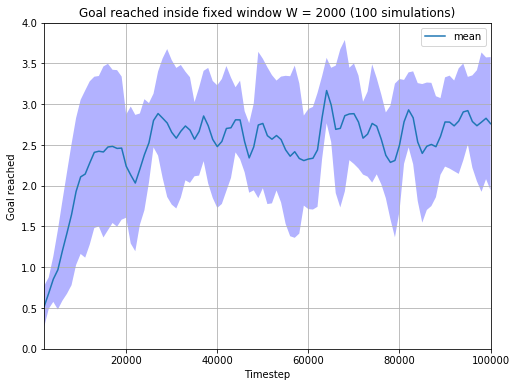

In [268]:
dir_name = "2018_05_30_101749_10sim_100000timesteps_normal/"
Ys = []

W = 2000
start = W
stop = 100000
step = 1000
X_fixed = range(start, stop + step, step) # List of fixed-timesteps

# For each simulation file
for f in glob.glob(dir_name + "*.csv"):
    if os.stat(f).st_size == 0:
        print('empty file', f)
        continue
    data = pd.read_csv(f)
    
    # Get data Timestep of Goal-Reached
    X = list(data[data['event'].str.startswith('reached goal')]['timestep'])
    
    # Get scores for fixed-timesteps
    Y = [score(X, e, W) for e in X_fixed]
    
    # Append to list
    Ys.append(Y)

X_Final = X_fixed
Y_Final = [sum(e)/len(e) for e in zip(*Ys)]


# Get min and max
Y_min = [min(e) for e in zip(*Ys)]
Y_max = [max(e) for e in zip(*Ys)]

# Standard deviation
Y_std = [np.std(np.asarray(e)) for e in zip(*Ys)]
Y_var = [np.var(np.asarray(e)) for e in zip(*Ys)]

# Plot fixed-timestep key-values
fig, ax = plt.subplots(figsize=(8, 6)) # 20, 10
ax.plot(X_Final, Y_Final)

ax.fill_between(X_Final, np.array(Y_Final) + np.array(Y_std), np.array(Y_Final) - np.array(Y_std), 
                facecolor='blue', alpha=0.3)

#ax.fill_between(X_Final, Y_min, Y_max, facecolor='yellow', alpha=0.1)

#ax.plot(X_Final, Y_Final_SMA)
#ax.fill_between(X_Final, Y_min_SMA, Y_max_SMA, facecolor='yellow', alpha=0.1)
ax.set_xlim(W, 100000)
ax.set_ylim(0, 4)
ax.set_xlabel('Timestep')
ax.set_ylabel('Goal reached')
ax.set_title('Goal reached inside fixed window w = {} (100 simulations)'.format(W))
ax.legend(['mean'], loc='upper right')
ax.grid()
plt.show()

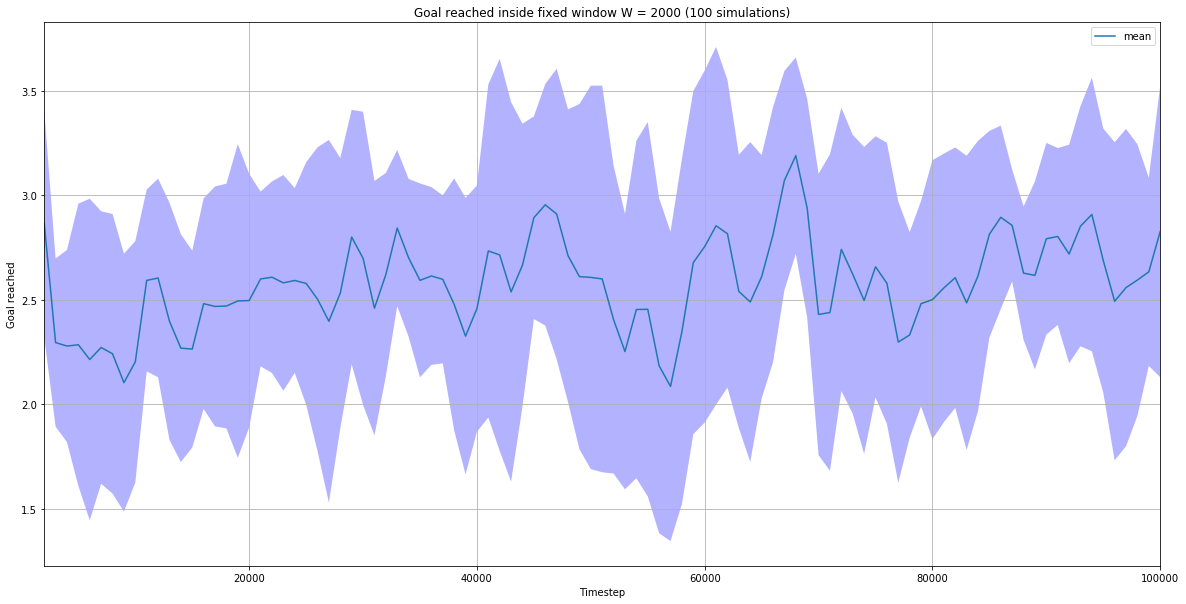

In [264]:
dir_name = "2018_05_30_110442_10sim_100000timesteps_loadfullweights/"
Ys = []

W = 2000
start = W
stop = 100000
step = 1000
X_fixed = range(start, stop + step, step) # List of fixed-timesteps

# For each simulation file
for f in glob.glob(dir_name + "*.csv"):
    if os.stat(f).st_size == 0:
        print('empty file', f)
        continue
    data = pd.read_csv(f)
    
    # Get data Timestep of Goal-Reached
    X = list(data[data['event'].str.startswith('reached goal')]['timestep'])
    
    # Get scores for fixed-timesteps
    Y = [score(X, e, W) for e in X_fixed]
    
    # Append to list
    Ys.append(Y)

X_Final = X_fixed
Y_Final = [sum(e)/len(e) for e in zip(*Ys)]


# Get min and max
Y_min = [min(e) for e in zip(*Ys)]
Y_max = [max(e) for e in zip(*Ys)]

# Standard deviation
Y_std = [np.std(np.asarray(e)) for e in zip(*Ys)]
Y_var = [np.var(np.asarray(e)) for e in zip(*Ys)]

# Plot fixed-timestep key-values
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(X_Final, Y_Final)

ax.fill_between(X_Final, np.array(Y_Final) + np.array(Y_std), np.array(Y_Final) - np.array(Y_std), 
                facecolor='blue', alpha=0.3)

#ax.fill_between(X_Final, Y_min, Y_max, facecolor='yellow', alpha=0.1)

#ax.plot(X_Final, Y_Final_SMA)
#ax.fill_between(X_Final, Y_min_SMA, Y_max_SMA, facecolor='yellow', alpha=0.1)
ax.set_xlim(W, 100000)
#ax.set_ylim(0, 5)
ax.set_xlabel('Timestep')
ax.set_ylabel('Goal reached')
ax.set_title('Goal reached inside fixed window W = {} (100 simulations)'.format(W))
ax.legend(['mean'], loc='upper right')
ax.grid()
plt.show()

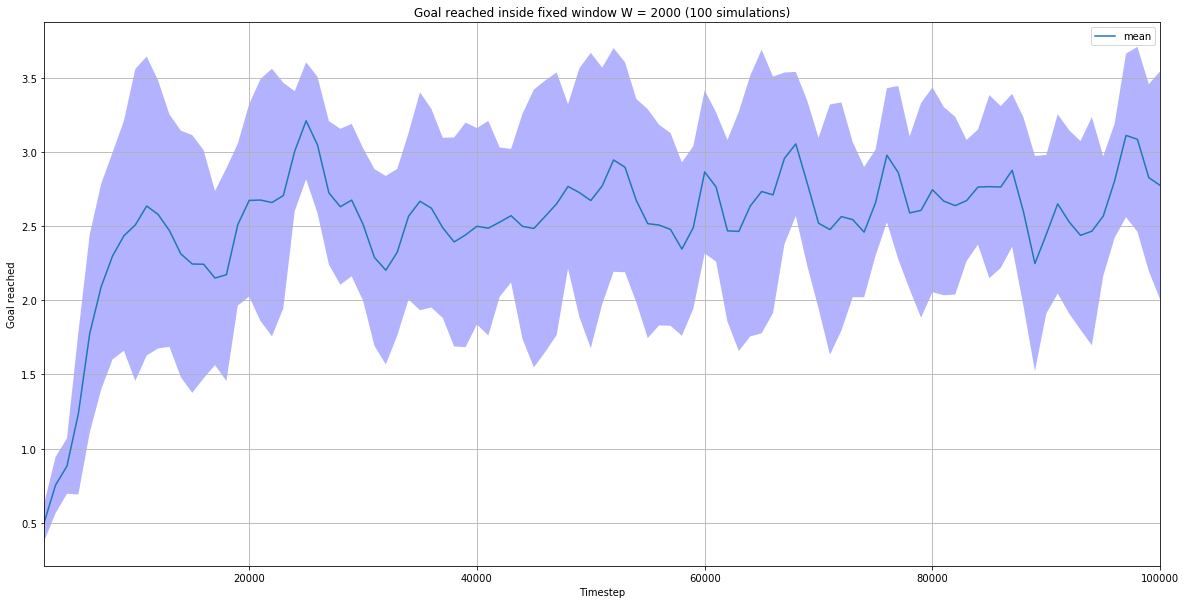

In [265]:
dir_name = "2018_05_30_115144_10sim_100000timesteps_loadh1h2/"
Ys = []

W = 2000
start = W
stop = 100000
step = 1000
X_fixed = range(start, stop + step, step) # List of fixed-timesteps

# For each simulation file
for f in glob.glob(dir_name + "*.csv"):
    if os.stat(f).st_size == 0:
        print('empty file', f)
        continue
    data = pd.read_csv(f)
    
    # Get data Timestep of Goal-Reached
    X = list(data[data['event'].str.startswith('reached goal')]['timestep'])
    
    # Get scores for fixed-timesteps
    Y = [score(X, e, W) for e in X_fixed]
    
    # Append to list
    Ys.append(Y)

X_Final = X_fixed
Y_Final = [sum(e)/len(e) for e in zip(*Ys)]


# Get min and max
Y_min = [min(e) for e in zip(*Ys)]
Y_max = [max(e) for e in zip(*Ys)]

# Standard deviation
Y_std = [np.std(np.asarray(e)) for e in zip(*Ys)]
Y_var = [np.var(np.asarray(e)) for e in zip(*Ys)]

# Plot fixed-timestep key-values
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(X_Final, Y_Final)

ax.fill_between(X_Final, np.array(Y_Final) + np.array(Y_std), np.array(Y_Final) - np.array(Y_std), 
                facecolor='blue', alpha=0.3)

#ax.fill_between(X_Final, Y_min, Y_max, facecolor='yellow', alpha=0.1)

#ax.plot(X_Final, Y_Final_SMA)
#ax.fill_between(X_Final, Y_min_SMA, Y_max_SMA, facecolor='yellow', alpha=0.1)
ax.set_xlim(W, 100000)
#ax.set_ylim(0, 5)
ax.set_xlabel('Timestep')
ax.set_ylabel('Goal reached')
ax.set_title('Goal reached inside fixed window W = {} (100 simulations)'.format(W))
ax.legend(['mean'], loc='upper right')
ax.grid()
plt.show()

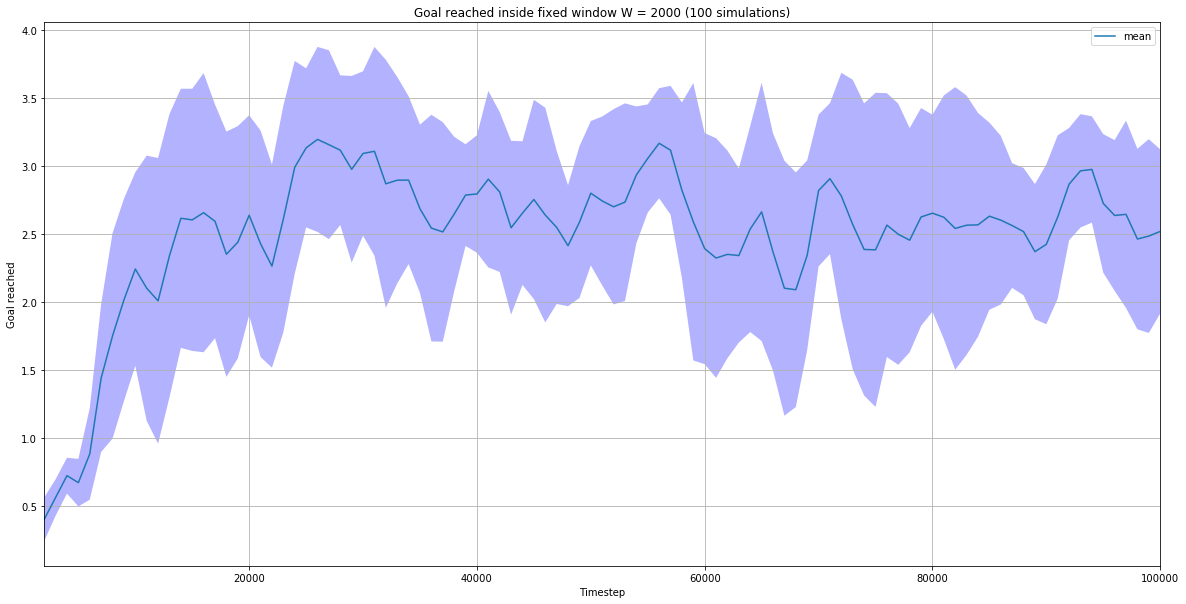

In [266]:
dir_name = "2018_05_30_135529_10sim_100000timesteps_loadh1/"
Ys = []

W = 2000
start = W
stop = 100000
step = 1000
X_fixed = range(start, stop + step, step) # List of fixed-timesteps

# For each simulation file
for f in glob.glob(dir_name + "*.csv"):
    if os.stat(f).st_size == 0:
        print('empty file', f)
        continue
    data = pd.read_csv(f)
    
    # Get data Timestep of Goal-Reached
    X = list(data[data['event'].str.startswith('reached goal')]['timestep'])
    
    # Get scores for fixed-timesteps
    Y = [score(X, e, W) for e in X_fixed]
    
    # Append to list
    Ys.append(Y)

X_Final = X_fixed
Y_Final = [sum(e)/len(e) for e in zip(*Ys)]


# Get min and max
Y_min = [min(e) for e in zip(*Ys)]
Y_max = [max(e) for e in zip(*Ys)]

# Standard deviation
Y_std = [np.std(np.asarray(e)) for e in zip(*Ys)]
Y_var = [np.var(np.asarray(e)) for e in zip(*Ys)]

# Plot fixed-timestep key-values
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(X_Final, Y_Final)

ax.fill_between(X_Final, np.array(Y_Final) + np.array(Y_std), np.array(Y_Final) - np.array(Y_std), 
                facecolor='blue', alpha=0.3)

#ax.fill_between(X_Final, Y_min, Y_max, facecolor='yellow', alpha=0.1)

#ax.plot(X_Final, Y_Final_SMA)
#ax.fill_between(X_Final, Y_min_SMA, Y_max_SMA, facecolor='yellow', alpha=0.1)
ax.set_xlim(W, 100000)
#ax.set_ylim(0, 5)
ax.set_xlabel('Timestep')
ax.set_ylabel('Goal reached')
ax.set_title('Goal reached inside fixed window W = {} (100 simulations)'.format(W))
ax.legend(['mean'], loc='upper right')
ax.grid()
plt.show()